# Домашнее задание №1

In [1]:
import numpy as np
import os

## Заполнение словаря значениями затрат

Словарь хранит в себе значения затрат за один шаг вверх и направо соответственно. Отсутствие перехода обозначено отрицательным числом -1.

In [2]:
import ast

def input_values(m, n, no_value = -1, save_path = os.path.join('data', 'map.txt')):
    """
    Позволяет запонить словарь (ключ - координата) значениями затрат при соответстующем направлении, также заполняет txt файл
    """
    way_map = {(row, column): [no_value, no_value] for row in range(m) for column in range(n)}
    with open(save_path, 'w') as f:
        for key in way_map.keys():
            if key[1] < n - 1:
                print(f'{key}->{(key[0], key[1]+1)}:')
                way_map[key][1] = int(input())
                f.write(f'{key}->{(key[0], key[1]+1)}: {way_map[key][1]}\n' )
            if key[0] < m - 1:
                print(f'{key}->{(key[0]+1, key[1])}:')
                way_map[key][0] = int(input())
                f.write(f'{key}->{(key[0]+1, key[1])}: {way_map[key][0]}\n' )
        return way_map

def read_map(map_path = os.path.join('data', 'map.txt'), no_value = -1):
    """
    Считывает координаты точек и затраты из txt файла
    """
    result = dict()
    with open(map_path, 'r') as f:
        info = f.readline()
        while info.strip():
            info = info.strip()
            direction, length = [info_part.strip() for info_part in info.split(':')]
            begin, end = [ast.literal_eval(direction_part) for direction_part in direction.split('->')]
            
            if begin not in result:
                result[begin] = [no_value, no_value]
            if end not in result:
                result[end] = [no_value, no_value]
            
            if end[0] - begin[0]>0:
                result[begin][0] = int(length)
            elif end[1] - begin[1]>0:
                result[begin][1] = int(length)
            
            info = f.readline()
            
        return result

Структура словаря выглядит следующим образом: ключ->значение затрат (упорядоченная пара значений для перехода наверх и направо соответственно)

In [3]:
way_map = read_map()
print(way_map)

{(0, 0): [12, 13], (0, 1): [10, 9], (1, 0): [10, 12], (0, 2): [13, 10], (1, 1): [9, 7], (0, 3): [15, -1], (1, 2): [12, 8], (1, 3): [11, -1], (2, 0): [9, 11], (2, 1): [8, 7], (2, 2): [8, 9], (2, 3): [10, -1], (3, 0): [8, 13], (3, 1): [7, 11], (3, 2): [8, 11], (3, 3): [11, -1], (4, 0): [10, 15], (4, 1): [9, 11], (4, 2): [9, 11], (4, 3): [12, -1], (5, 0): [-1, 18], (5, 1): [-1, 12], (5, 2): [-1, 9], (5, 3): [-1, -1]}


## Поиск оптимального пути и оптимальных затрат

In [8]:
def find_min(point, way_map, opt_cost, no_value = -1):
    """
    Ищет минимальную величину затрат и направление для конкретной точки для задачи о наборе высоты и скорости
        (при условии, что соседние точки имеют оптимальные значения затрат или конкретная точка крайняя)
    Args:
        point (tuple): текущая точка
        way_map (dict): словарь, в котором для каждого ключа (аргумента) хранится значение затрат
            за один шаг вверх и направо соответственно
        opt_cost (np.array): матрица оптимальных затрат
            (каждое значение в матрице соответствует значению оптимпльных затрат для соответствующей координаты)
        no_value (int): значение "заглушка"
    Returns:
        tuple: значение оптимальных затрат и направление
    """
    if point[0] == opt_cost.shape[0] - 1 and point[1] == opt_cost.shape[1] - 1:
        return 0, no_value

    up_value, right_value = way_map[point]
    if point[0] == opt_cost.shape[0] - 1:
        return right_value + opt_cost[point[0], point[1]+1], 'right'
    elif point[1] == opt_cost.shape[1] - 1:
        return up_value + opt_cost[point[0]+1, point[1]], 'up'
    else:
        if up_value + opt_cost[point[0]+1, point[1]]<right_value + opt_cost[point[0], point[1]+1]:
            return up_value + opt_cost[point[0]+1, point[1]], 'up' 
        else:
            return right_value + opt_cost[point[0], point[1]+1], 'right'
def solve_dynamically(way_map, m, n, no_value = -1):
    """
    Ищет матрицу оптимальных затрат и матрицу направлений для задачи о наборе высоты и скорости
    Args:
        way_map (dict): словарь, в котором для каждого ключа (аргумента) хранится значение затрат
            за один шаг вверх и направо соответственно
        m (int): кол-во строк
        n (int): кол-во столбцов
    Returns:
        tuple: Матрица оптимальных значений затрат и матрица оптимальных направлений
    """
    max_path_length = m+n-2
    directions_map = np.chararray((m, n), itemsize = 5)
    directions_map[:] = no_value
    opt_cost = no_value * np.ones((m, n))
    
    # Для каждой длины пути (от 0 до максимума) ищем оптимальные затраты и направления
    for current_path_length in range(max_path_length + 1):
        # Находим точки, удовлетворяющие условию текущей длины пути        
        current_points = [(row, column) for row in range(m) for column in range(n) if max_path_length - (row+column) == current_path_length]
        print(current_path_length, current_points)
        print()
        # Обновляем значения оптимальных затрат и направления для соответствующих точек       
        for point in current_points:
            opt_cost[point[0], point[1]], directions_map[point[0], point[1]] = find_min(point, way_map, opt_cost, no_value)
    
    return opt_cost, directions_map

Первая переменная хранит в себе значения оптимальных затрат для каждой точки. Вторая переменная хранит переходы между точками.

In [9]:
opt_cost, directions_map = solve_dynamically(way_map, 6, 4)
opt_cost, directions_map

0 [(5, 3)]

1 [(4, 3), (5, 2)]

2 [(3, 3), (4, 2), (5, 1)]

3 [(2, 3), (3, 2), (4, 1), (5, 0)]

4 [(1, 3), (2, 2), (3, 1), (4, 0)]

5 [(0, 3), (1, 2), (2, 1), (3, 0)]

6 [(0, 2), (1, 1), (2, 0)]

7 [(0, 1), (1, 0)]

8 [(0, 0)]



(array([[73., 60., 59., 59.],
        [62., 50., 46., 44.],
        [52., 41., 34., 33.],
        [49., 36., 26., 23.],
        [44., 29., 18., 12.],
        [39., 21.,  9.,  0.]]),
 chararray([[b'right', b'up', b'up', b'up'],
            [b'right', b'up', b'up', b'up'],
            [b'right', b'right', b'up', b'up'],
            [b'right', b'up', b'up', b'up'],
            [b'right', b'right', b'up', b'up'],
            [b'right', b'right', b'right', b'-1']], dtype='|S5'))

## Оригинальный график, решение вручную и результат алгоритма

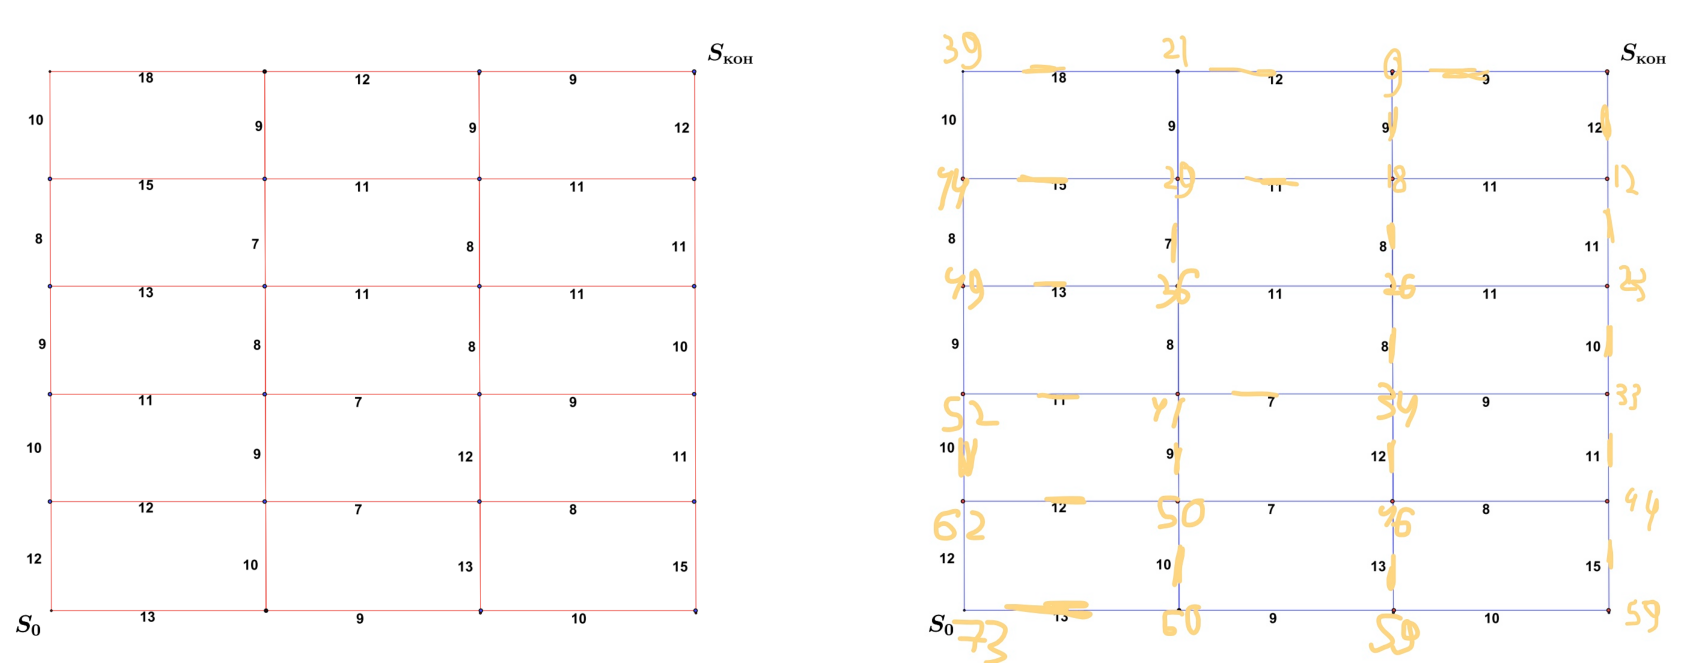

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cv2

def get_optimal_path(point, directions_map, no_value = -1):
    """
    Возвращает путь от конкретной точки до конечной
    """
    points = [point]
    m, n = directions_map.shape
    for _ in range(m+n):
        direction = directions_map[point]
        if direction == bytes('up', encoding = 'utf-8'):
            point = (point[0]+1, point[1])
        elif direction == bytes('right', encoding = 'utf-8'):
            point = (point[0], point[1]+1)
        points+=[point]
    return np.array(points)[:,::-1]

plt.figure(figsize = [30, 30])
plt.subplot(2,2,1)
plt.imshow(cv2.imread(os.path.join('data', 'hw-1.5.png'))[:,:,::-1])
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(cv2.imread(os.path.join('data', 'manually_hw-1.5.jpg')))
plt.axis('off')
print()

Оптимальные затраты:  73.0


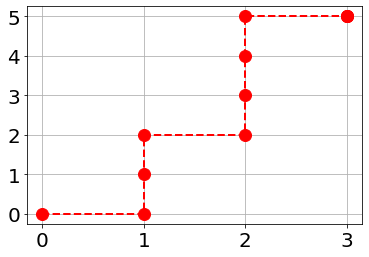

In [11]:
opt_path = get_optimal_path((0,0), directions_map)
plt.plot(opt_path[:,0], opt_path[:,1], 'ro--', linewidth=2, markersize=12)
plt.xticks(range(directions_map.shape[1]))
plt.yticks(range(directions_map.shape[0]))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
print('Оптимальные затраты: ', opt_cost[0,0])